In [1]:
import glob
import os
import PIL
import torch
from torchvision import transforms as T
from torchvision import datasets
from torchvision.io import read_image
import json

from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm

In [11]:
# parameters
dataroot = "./data/celeba/"
img_dir = dataroot + "image/"
annotation = dataroot + "anno/"
image_size = 64
channels = 3
batch_size = 128

In [12]:
# image transformations
transforms = T.Compose([
    T.ToTensor(),
    T.Resize((image_size, image_size)),
    T.RandomHorizontalFlip(),
    # T.Normalize((0.5), (0.5))# T.Normalize([0.5],[0.5])
])

In [13]:
class Celeba(Dataset):
    def __init__(self, img_dir, annotation_file, transforms=None, mode="train"):
        self.annotation_file = annotation_file
        self.train_test_split = self.annotation_file + 'list_eval_partition.txt'
        self.mode = mode            # 162770
        self.train_test_split_num = 162770
        self.img_num = 182638
        
        self.img_dir = img_dir
        self.transform = transforms
        self.train_image = []
        self.test_image = []
        for img in os.listdir(self.img_dir):
            if int(img.split('.')[0]) < self.train_test_split_num:
                self.train_image.append(img)
            elif int(img.split('.')[0]) >= self.train_test_split_num & int(img.split('.')[0]) < self.img_num:
                self.test_image.append(img)
        
    def __len__(self):
        if self.mode == "train":
            return len(self.train_image)
        else:
            return len(self.test_image)
                
    def __getitem__(self, idx):
        if self.mode == "train":
            if idx >= self.train_test_split_num:
                raise Exception("Over Index")
        else:
            if idx >= self.train_test_split_num & idx < self.img_num:
                raise Exception("Over Index")
        img_path = self.img_dir + "{:0>6}.png".format(idx)
        image = PIL.Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image

In [14]:
train_dataset = Celeba(img_dir, annotation, transforms)
test_dataset = Celeba(img_dir, annotation, transforms, mode= "test")


In [15]:
train_dataset[162769].size()    # tensor

torch.Size([3, 64, 64])

<class 'torch.Tensor'>
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=64x64 at 0x7FDC590D87C0>


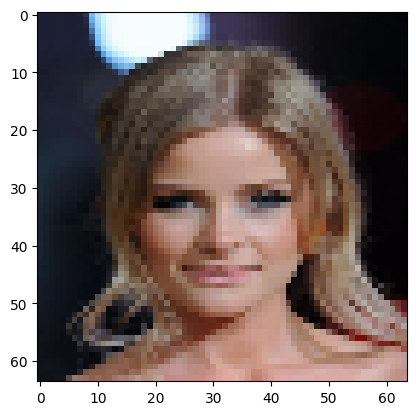

In [16]:
tf = T.ToPILImage()
idx = 10
test = train_dataset[idx]
print(type(test))
test_img2 = tf(test)
print(type(test_img2))
print(test_img2)
# r = PIL.Image.open(test_img2)
# print(r)
plt.imshow(test_img2)

In [17]:
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle= True)

In [18]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

Feature batch shape: torch.Size([128, 3, 64, 64])


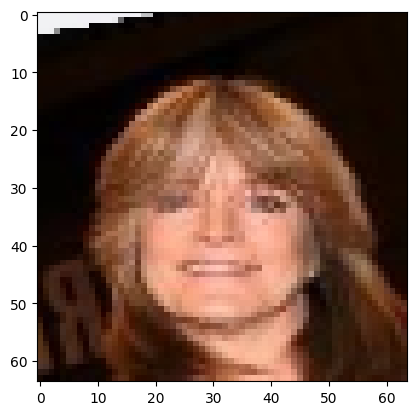

In [19]:
# 이미지와 정답(label)을 표시합니다.
train_features = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
img = train_features[0].squeeze()
# img = T.ToPILImage(img)
tf = T.ToPILImage()
img = tf(img)
plt.imshow(img, cmap="gray")
plt.show()